# **PR0501. Ingesta de datos de ficheros CSV**

En esta primera práctica practicaremos con la carga de datos en dataframes de Spark. Para cada uno de los ejercicios tienes que cargar el dataset referenciado definiendo tú previamente el esquema. Una vez que lo hayas hecho muestra el esquema del dataframe y muestra los 5 primeros registros.

In [4]:
from pyspark.sql import SparkSession

try:
    spark = ( SparkSession.builder
    .appName("Haciendo pruebas")
    .master("spark://spark-master:7077")
    .getOrCreate()
    )

    print("SparkSession iniciada correctamente.")
except Exception as e:
    print("Error en la conexión")
    print(e)


SparkSession iniciada correctamente.


## **Dataset 1: Datos para la predicción del rendimiento en cultivos**

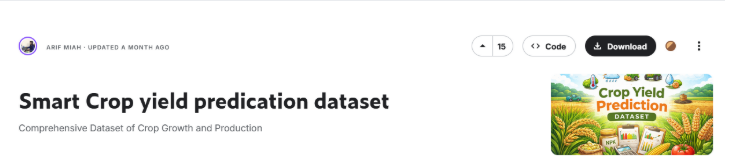

In [4]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, LongType

schema = StructType([
    StructField("Crop",StringType(),True),
    StructField("Region",StringType(),True),
    StructField("Soil_Type",StringType(),True),
    StructField("Soil_pH",DoubleType(),True),
    StructField("Rainfall_mm",DoubleType(),True),
    StructField("Temperature_C",DoubleType(),True),
    StructField("Humidity_pct",DoubleType(),True),
    StructField("Fertilizer_Used_kg",DoubleType(),True),
    StructField("Irrigation",StringType(),True),
    StructField("Pesticides_Used_kg",DoubleType(),True),
    StructField("Planting_Density",DoubleType(),True),
    StructField("Previous_Crop",StringType(),True),
    StructField("Yield_ton_per_ha",DoubleType(),True)
])

df_cultivos = (spark.read
    .format("csv")
    .schema(schema)
    .option("header", "true")
    .option("quote", "\"")
    .load("./crop_yield_dataset.csv")
)

df_cultivos.printSchema()

df_cultivos.show(5)

root
 |-- Crop: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Soil_Type: string (nullable = true)
 |-- Soil_pH: double (nullable = true)
 |-- Rainfall_mm: double (nullable = true)
 |-- Temperature_C: double (nullable = true)
 |-- Humidity_pct: double (nullable = true)
 |-- Fertilizer_Used_kg: double (nullable = true)
 |-- Irrigation: string (nullable = true)
 |-- Pesticides_Used_kg: double (nullable = true)
 |-- Planting_Density: double (nullable = true)
 |-- Previous_Crop: string (nullable = true)
 |-- Yield_ton_per_ha: double (nullable = true)



26/01/17 12:34:35 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
                                                                                

+------+--------+---------+-------+-----------+-------------+------------+------------------+----------+------------------+----------------+-------------+----------------+
|  Crop|  Region|Soil_Type|Soil_pH|Rainfall_mm|Temperature_C|Humidity_pct|Fertilizer_Used_kg|Irrigation|Pesticides_Used_kg|Planting_Density|Previous_Crop|Yield_ton_per_ha|
+------+--------+---------+-------+-----------+-------------+------------+------------------+----------+------------------+----------------+-------------+----------------+
| Maize|Region_C|    Sandy|   7.01|     1485.4|         19.7|        40.3|             105.1|      Drip|              10.2|            23.2|         Rice|          101.48|
|Barley|Region_D|     Loam|   5.79|      399.4|         29.1|        55.4|             221.8| Sprinkler|              35.5|             7.4|       Barley|          127.39|
|  Rice|Region_C|     Clay|   7.24|      980.9|         30.5|        74.4|              61.2| Sprinkler|              40.0|             5.1|

## **Dataset 2: Lugares famosos del mundo**

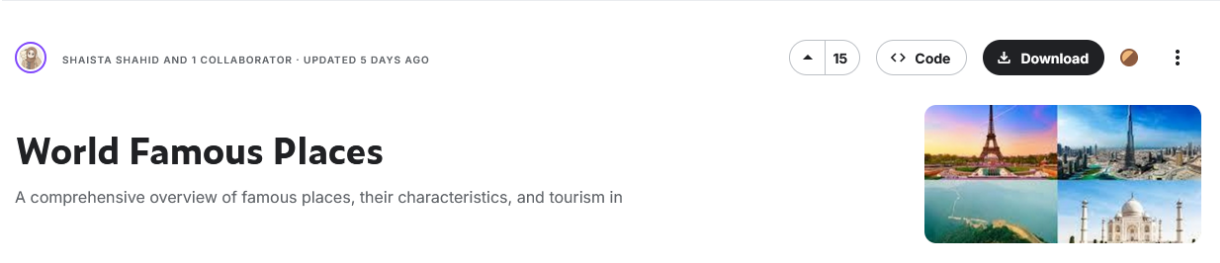

In [5]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, LongType, IntegerType 

schema = StructType([
    StructField("Place_Name", StringType(), True),
    StructField("Country", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Annual_Visitors_Millions", DoubleType(), True),
    StructField("Type", StringType(), True),
    StructField("UNESCO_World_Heritage", StringType(), True), 
    StructField("Year_Built", IntegerType(), True),
    StructField("Entry_Fee_USD", DoubleType(), True),
    StructField("Best_Visit_Month", StringType(), True),
    StructField("Tourism_Revenue_Million_USD", DoubleType(), True),
    StructField("Average_Visit_Duration_Hours", DoubleType(), True),
    StructField("Famous_For", StringType(), True),
])

df_lugares = (spark.read
    .format("csv")
    .schema(schema)
    .option("header", "true")
    .option("quote", "\"")
    .load("./world_famous_places_2024.csv")
)

df_lugares.printSchema()

df_lugares.show(5)

root
 |-- Place_Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Annual_Visitors_Millions: double (nullable = true)
 |-- Type: string (nullable = true)
 |-- UNESCO_World_Heritage: string (nullable = true)
 |-- Year_Built: integer (nullable = true)
 |-- Entry_Fee_USD: double (nullable = true)
 |-- Best_Visit_Month: string (nullable = true)
 |-- Tourism_Revenue_Million_USD: double (nullable = true)
 |-- Average_Visit_Duration_Hours: double (nullable = true)
 |-- Famous_For: string (nullable = true)



[Stage 1:>                                                          (0 + 1) / 1]

+-------------------+-------------+----------------+------------------------+------------------+---------------------+----------+-------------+-----------------+---------------------------+----------------------------+----------+
|         Place_Name|      Country|            City|Annual_Visitors_Millions|              Type|UNESCO_World_Heritage|Year_Built|Entry_Fee_USD| Best_Visit_Month|Tourism_Revenue_Million_USD|Average_Visit_Duration_Hours|Famous_For|
+-------------------+-------------+----------------+------------------------+------------------+---------------------+----------+-------------+-----------------+---------------------------+----------------------------+----------+
|       Eiffel Tower|       France|           Paris|                     7.0|    Monument/Tower|                   No|      1889|         35.0|May-June/Sept-Oct|                       NULL|                        95.0|       2.5|
|       Times Square|United States|   New York City|                    50.0|   

## **Conjunto de datos 3: Registro turístico de Castilla y León**

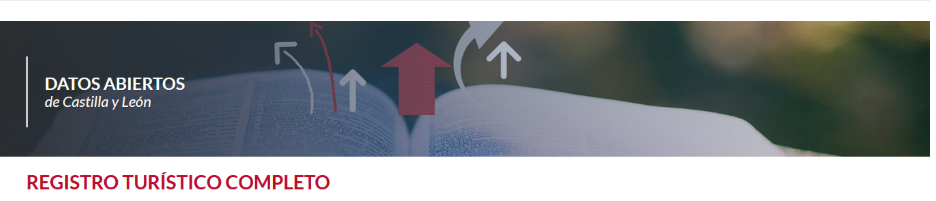

In [3]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType, BooleanType, LongType

schema = StructType([
    StructField("establecimiento",StringType(),True),
    StructField("n_registro",StringType(),True),
    StructField("codigo",StringType(),True),
    StructField("tipo",StringType(),True),
    StructField("categoria",StringType(),True),
    StructField("especialidades",StringType(),True),
    StructField("clase",StringType(),True),
    StructField("nombre",StringType(),True),
    StructField("direccion",StringType(),True),
    StructField("c_postal",IntegerType(),True),
    StructField("provincia",StringType(),True),
    StructField("municipio",StringType(),True),
    StructField("localidad",StringType(),True),
    StructField("nucleo",StringType(),True),
    StructField("telefono_1",LongType(),True),
    StructField("telefono_2",LongType(),True),
    StructField("telefono_3",LongType(),True),
    StructField("email",StringType(),True),
    StructField("web",StringType(),True),
    StructField("q_calidad",StringType(),True),
    StructField("posada_real",StringType(),True),
    StructField("plazas",IntegerType(),True),
    StructField("gps_longitud",DoubleType(),True),
    StructField("gps_latitud",DoubleType(),True),
    StructField("accesible_a_personas_con_discapacidad",StringType(),True),
    StructField("column_27",StringType(),True),
    StructField("posicion",StringType(),True),

])
df_turistico = (spark.read
        .format("csv")
        .option("header","true")
        .option("sep",";")
        .schema(schema)
        .load("./registro-de-turismo-de-castilla-y-leon.csv")
     )
df_turistico.printSchema()
df_turistico.show(5)

root
 |-- establecimiento: string (nullable = true)
 |-- n_registro: string (nullable = true)
 |-- codigo: string (nullable = true)
 |-- tipo: string (nullable = true)
 |-- categoria: string (nullable = true)
 |-- especialidades: string (nullable = true)
 |-- clase: string (nullable = true)
 |-- nombre: string (nullable = true)
 |-- direccion: string (nullable = true)
 |-- c_postal: integer (nullable = true)
 |-- provincia: string (nullable = true)
 |-- municipio: string (nullable = true)
 |-- localidad: string (nullable = true)
 |-- nucleo: string (nullable = true)
 |-- telefono_1: long (nullable = true)
 |-- telefono_2: long (nullable = true)
 |-- telefono_3: long (nullable = true)
 |-- email: string (nullable = true)
 |-- web: string (nullable = true)
 |-- q_calidad: string (nullable = true)
 |-- posada_real: string (nullable = true)
 |-- plazas: integer (nullable = true)
 |-- gps_longitud: double (nullable = true)
 |-- gps_latitud: double (nullable = true)
 |-- accesible_a_personas

26/01/24 16:48:47 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
                                                                                

+--------------------+----------+------+--------------------+---------------+--------------+-----+--------------------+--------------------+--------+---------+---------+---------------+---------------+----------+----------+----------+--------------------+--------------------+---------+-----------+------+------------+-----------+-------------------------------------+---------+--------------------+
|     establecimiento|n_registro|codigo|                tipo|      categoria|especialidades|clase|              nombre|           direccion|c_postal|provincia|municipio|      localidad|         nucleo|telefono_1|telefono_2|telefono_3|               email|                 web|q_calidad|posada_real|plazas|gps_longitud|gps_latitud|accesible_a_personas_con_discapacidad|column_27|            posicion|
+--------------------+----------+------+--------------------+---------------+--------------+-----+--------------------+--------------------+--------+---------+---------+---------------+---------------

26/01/24 16:48:55 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
